# Useful links

- [ ] https://cran.r-project.org/web/packages/afex/vignettes/introduction-mixed-models.pdf
- [ ] https://cran.r-project.org/web/packages/afex/afex.pdf
- [ ] https://cran.r-project.org/web/packages/afex/index.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_analysing_accuracy_data.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_anova_example.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_mixed_example.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/messy-data.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/interactions.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/basics.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_mixed_example.html

- [ ] https://osf.io/nfwx7/

- [ ] https://stats.stackexchange.com/questions/13166/rs-lmer-cheat-sheet

- [ ] https://psu-psychology.github.io/r-bootcamp-2018/index.html
- [ ] http://tysonbarrett.com/EDUC-6600/Resources/Example_Ch15_rmANOVA.html
- [ ] http://singmann.org/anova-in-r-afex-may-be-the-solution-you-are-looking-for/
- [ ] https://ademos.people.uic.edu/Chapter21.html
- [ ] https://www.psychologie.uni-heidelberg.de/ae/meth/team/mertens/blog/anova_in_r_made_easy.nb.html
- [ ] http://tysonbarrett.com/EDUC-6600/Resources/Example_Ch15_rmANOVA.html

# Setup

## Imports

In [1]:
library("dplyr")
library("tidyr")
library("afex")     # provides mixed() and attaches lme4 automatically.
library("emmeans")  # follow-up tests.
library("multcomp") # advanced control for multiple testing/Type 1 errors.
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'KR', 'S', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: library('emmeans') now needs to be called explicitly!
- Get and set global pac

In [2]:
library("car")
require("lattice")
require("ez")

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: lattice

Loading required package: ez



In [3]:
library("cowplot")
library("ggbeeswarm")

library("nortest")

In [4]:
# library("apa")

In [5]:
library("effectsize")

In [6]:
library("effsize")

## Settings

In [7]:
theme_set(theme_bw(base_size = 15) +
            theme(legend.position="bottom",
                  panel.grid.major.x = element_blank()))

In [8]:
options(width=120)

## Session info

In [9]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C               LC_TIME=en_IL.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_IL.UTF-8    LC_MESSAGES=en_US.UTF-8    LC_PAPER=en_IL.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C             LC_MEASUREMENT=en_IL.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] effsize_0.8.1    effectsize_0.3.3 nortest_1.0-4    ggbeeswarm_0.6.0 cowplot_1.1.0    ez_4.4-0        
 [7] lattice_0.20-41  car_3.0-10       carData_3.0-4    ggplot2_3.3.2    multcomp_1.4-14  TH.data_1.0-10  
[13] MASS_7.3-53      survival_3.2-7   mvtnorm_1.1-1    emmeans_1.5.1  

## Create output directory

In [10]:
dir.create("data/t1008",showWarnings = FALSE,recursive = TRUE)

## Handy functions

### Function for displaying results in APA 6

In [11]:
library(xtable)
library(IRdisplay)
library(repr)
require("papaja")
require("tinytex")
apaMd <- function(apaObj){
    apaStr <- ""
    for (ii in names(apaObj)){
        apaStr <- paste(apaStr, paste("\n","### ", ii, "\n" ,sep="" ,collapse = "")  ,sep="" ,collapse = "")
        if(!(ii == "table")){ 
            for (jj in names(apaObj[[ii]])){
                apaStr <- paste(apaStr, paste("- ", ii," for `", jj, "` is ", "\n" ,sep="" ,collapse = "")  ,sep="\n" ,collapse = " ")
                apaStr <- paste(apaStr, paste("  - ", apaObj[[ii]][[jj]], "\n" ,sep="" ,collapse = "")  ,sep="\n" ,collapse = " ")
                }}
        else {
            # apaStr <- paste(apaStr, "\n\n", paste(apa_table(apaObj$table))  ,sep="\n" ,collapse = " ")
            apaStr <- paste(apaStr, paste("- support for will arrive some day", "\n" ,sep="" ,collapse = "")  ,sep="\n" ,collapse = " ")
            apaStr <- paste(apaStr, paste("- for now please use apa_table function", "\n" ,sep="" ,collapse = "")  ,sep="\n" ,collapse = " ")

        }}
    return(apaStr)
}


Attaching package: ‘IRdisplay’


The following object is masked from ‘package:xtable’:

    display


Loading required package: papaja

Loading required package: tinytex



# Load data

Depending on how much data you want to include select a file to be loaded (either by executing relevant cell or by clicking ↑ or ↓ above to move cells up or down, the last executed cell containing `ifName` defines the file to be loaded).

In [12]:
ifName="data/t1007/bigDF__df2_unstacked__clean.RData" # 752554 obs

In [13]:
load(file=ifName)

In [14]:
ifName="data/t1007/bigDF__df2_unstacked__aov_4_a1vb01Prc__nrow_681652.RData" # 752554 obs

In [15]:
load(file=ifName)

In [16]:
ifName="data/t1007/bigDF__df2_unstacked__aov_4_a2ag01Prc__nrow_681652.RData" # 752554 obs

In [17]:
load(file=ifName)

In [18]:
ls()

[1] "a1vb01Prc" "a2ag01Prc" "apaMd"     "df2"       "ifName"

# Inspect data

## Quick look at data

In [19]:
str(df2)

'data.frame':	681652 obs. of  17 variables:
 $ CAMP       : Factor w/ 2 levels "metoo","sexstrike": 1 1 1 1 1 1 1 1 1 1 ...
 $ TYPE       : Factor w/ 2 levels "ctrl","orig": 1 1 1 1 1 1 1 1 1 1 ...
 $ wordCnt    : num  11 7 11 27 30 26 8 12 12 23 ...
 $ vb01Cnt    : num  0 0 0 2 0 0 1 0 1 0 ...
 $ ag01Cnt    : num  0 0 0 0 1 1 0 0 1 2 ...
 $ vb01Prc    : num  0 0 0 7.41 0 ...
 $ ag01Prc    : num  0 0 0 0 3.33 ...
 $ ID         : chr  "919714354467045376" "919714354479722496" "919714354500653056" "919714354542600192" ...
 $ tweet_url  : chr  "/IamJonesy3/status/919714354467045376" "/CCmee_/status/919714354479722496" "/SarahJaneVlogs/status/919714354500653057" "/queentyreen/status/919714354542600195" ...
 $ user_id    : chr  "588400632" "242582835" "29298715" "3290716455" ...
 $ is_replied : logi  TRUE FALSE FALSE TRUE FALSE TRUE ...
 $ is_reply_to: logi  TRUE FALSE FALSE TRUE FALSE FALSE ...
 $ likes      : num  1 0 1 0 0 38 0 0 1 1 ...
 $ replies    : num  1 0 0 1 0 5 0 0 0 0 ...
 $ re

## Summary

In [20]:
summary(df2)

        CAMP          TYPE           wordCnt          vb01Cnt           ag01Cnt           vb01Prc       
 metoo    :613635   ctrl:353731   Min.   :  5.00   Min.   : 0.0000   Min.   : 0.0000   Min.   :  0.000  
 sexstrike: 68017   orig:327921   1st Qu.: 11.00   1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.:  0.000  
                                  Median : 18.00   Median : 1.0000   Median : 0.0000   Median :  2.439  
                                  Mean   : 18.43   Mean   : 0.8063   Mean   : 0.6863   Mean   :  4.413  
                                  3rd Qu.: 24.00   3rd Qu.: 1.0000   3rd Qu.: 1.0000   3rd Qu.:  7.547  
                                  Max.   :106.00   Max.   :17.0000   Max.   :21.0000   Max.   :100.000  
    ag01Prc             ID             tweet_url           user_id          is_replied      is_reply_to    
 Min.   :  0.000   Length:681652      Length:681652      Length:681652      Mode :logical   Mode :logical  
 1st Qu.:  0.000   Class :character   Class :char

In [21]:
summary(a1vb01Prc)

,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CAMP,1,681648,33.73904,690.32244045,1.011701e-03,4.531552e-152
TYPE,1,681648,33.73904,0.02922063,4.286762e-08,8.642707e-01
CAMP:TYPE,1,681648,33.73904,142.14341243,2.084856e-04,9.115624e-33


In [22]:
summary(a2ag01Prc)

,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CAMP,1,681648,36.20482,1102.265888,0.0016144496,1.659872e-241
TYPE,1,681648,36.20482,5.538231,0.0000081247,1.860567e-02
CAMP:TYPE,1,681648,36.20482,506.682508,0.0007427678,3.673188e-112


In [ ]:
#                _____                    _____                    _____                    _____          
#               /\    \                  /\    \                  /\    \                  /\    \         
#              /::\____\                /::\    \                /::\    \                /::\    \        
#             /:::/    /               /::::\    \              /::::\    \              /::::\    \       
#            /:::/    /               /::::::\    \            /::::::\    \            /::::::\    \      
#           /:::/    /               /:::/\:::\    \          /:::/\:::\    \          /:::/\:::\    \     
#          /:::/____/               /:::/__\:::\    \        /:::/__\:::\    \        /:::/__\:::\    \    
#         /::::\    \              /::::\   \:::\    \      /::::\   \:::\    \      /::::\   \:::\    \   
#        /::::::\    \   _____    /::::::\   \:::\    \    /::::::\   \:::\    \    /::::::\   \:::\    \  
#       /:::/\:::\    \ /\    \  /:::/\:::\   \:::\    \  /:::/\:::\   \:::\____\  /:::/\:::\   \:::\    \ 
#      /:::/  \:::\    /::\____\/:::/__\:::\   \:::\____\/:::/  \:::\   \:::|    |/:::/__\:::\   \:::\____\
#      \::/    \:::\  /:::/    /\:::\   \:::\   \::/    /\::/   |::::\  /:::|____|\:::\   \:::\   \::/    /
#       \/____/ \:::\/:::/    /  \:::\   \:::\   \/____/  \/____|:::::\/:::/    /  \:::\   \:::\   \/____/ 
#                \::::::/    /    \:::\   \:::\    \            |:::::::::/    /    \:::\   \:::\    \     
#                 \::::/    /      \:::\   \:::\____\           |::|\::::/    /      \:::\   \:::\____\    
#                 /:::/    /        \:::\   \::/    /           |::| \::/____/        \:::\   \::/    /    
#                /:::/    /          \:::\   \/____/            |::|  ~|               \:::\   \/____/     
#               /:::/    /            \:::\    \                |::|   |                \:::\    \         
#              /:::/    /              \:::\____\               \::|   |                 \:::\____\        
#              \::/    /                \::/    /                \:|   |                  \::/    /        
#               \/____/                  \/____/                  \|___|                   \/____/         

# Var Types

| name         | meta   | descr                       |
|--------------|--------|-----------------------------|
| `ID`         | `u1`   | observation unit (tweet_id) |
| `vb01Prc`    | `d1`   | outcome (dependent)         |
| `ag01Prc`    | `d2`   | outcome (dependent)         |
| `CAMP`       | `b1`   | between tweet               |
| `TYPE`       | `b2`   | between tweet               |

## Generate APA-like LaTeX for AOV results (and for follow-ups)

In [23]:
a1vb01Prc_APA <- apa_print(a1vb01Prc)
a2ag01Prc_APA <- apa_print(a2ag01Prc)

In [24]:
a1vb01PrcEm1 <- emmeans(a1vb01Prc, specs<-c("CAMP", "TYPE"))
a2ag01PrcEm1 <- emmeans(a2ag01Prc, specs<-c("CAMP", "TYPE"))

In [25]:
a1vb01PrcEm1_APA <- apa_print(a1vb01PrcEm1)
a2ag01PrcEm1_APA <- apa_print(a2ag01PrcEm1)

In [26]:
a1vb01PrcEm1_pairs <- pairs(a1vb01PrcEm1)
a2ag01PrcEm1_pairs <- pairs(a2ag01PrcEm1)

In [27]:
a1vb01PrcEm1_pairs_APA <- apa_print(a1vb01PrcEm1_pairs)
a2ag01PrcEm1_pairs_APA <- apa_print(a2ag01PrcEm1_pairs)

In [28]:
TEST=adjusted("bonferroni")

In [29]:
TEST=adjusted("free")

In [30]:
a1vb01Prc_APA$table

,Effect,F,df1,df2,MSE,p,ges
,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>
1,CAMP,690.32,1,"681,648",33.74,< .001,.001
2,TYPE,0.03,1,"681,648",33.74,.864,.000
3,CAMP $\times$ TYPE,142.14,1,"681,648",33.74,< .001,.000


In [31]:
a2ag01Prc_APA$table

,Effect,F,df1,df2,MSE,p,ges
,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>
1,CAMP,"1,102.27",1,"681,648",36.20,< .001,.002
2,TYPE,5.54,1,"681,648",36.20,.019,.000
3,CAMP $\times$ TYPE,506.68,1,"681,648",36.20,< .001,.001


In [32]:
display_markdown(apaMd(a1vb01Prc_APA["full_result"]))


### full_result

- full_result for `CAMP` is 

  - $F(1, 681,648) = 690.32$, $\mathit{MSE} = 33.74$, $p < .001$, $\hat{\eta}^2_G = .001$

- full_result for `TYPE` is 

  - $F(1, 681,648) = 0.03$, $\mathit{MSE} = 33.74$, $p = .864$, $\hat{\eta}^2_G = .000$

- full_result for `CAMP_TYPE` is 

  - $F(1, 681,648) = 142.14$, $\mathit{MSE} = 33.74$, $p < .001$, $\hat{\eta}^2_G = .000$


In [33]:
display_markdown(apaMd(a2ag01Prc_APA["full_result"]))


### full_result

- full_result for `CAMP` is 

  - $F(1, 681,648) = 1,102.27$, $\mathit{MSE} = 36.20$, $p < .001$, $\hat{\eta}^2_G = .002$

- full_result for `TYPE` is 

  - $F(1, 681,648) = 5.54$, $\mathit{MSE} = 36.20$, $p = .019$, $\hat{\eta}^2_G = .000$

- full_result for `CAMP_TYPE` is 

  - $F(1, 681,648) = 506.68$, $\mathit{MSE} = 36.20$, $p < .001$, $\hat{\eta}^2_G = .001$


## Summarize data by `CAMP`

In [35]:
smr0 <- df2 %>%
    group_by(CAMP) %>%
    summarise(
        N = n(),
        wcM = mean(wordCnt),
        wcSD = sd(wordCnt),
        wcSE = wcSD / sqrt(N),
        vbM = mean(vb01Prc),
        vbSD = sd(vb01Prc),
        vbSE = vbSD / sqrt(N),
        agM = mean(ag01Prc),
        agSD = sd(ag01Prc),
        agSE = agSD / sqrt(N),
        .groups = "drop"
    ) 
smr0

CAMP,N,wcM,wcSD,wcSE,vbM,vbSD,vbSE,agM,agSD,agSE
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
metoo,613635,18.07358,8.108003,0.01035044,4.353178,5.799904,0.007403988,3.724676,6.003949,0.007664467
sexstrike,68017,21.66789,13.787225,0.05286499,4.956720,5.902798,0.022633367,4.506136,6.205744,0.023794969


## Summarize by type `TYPE`

In [36]:
smr0 <- df2 %>%
    group_by(TYPE) %>%
    summarise(
        N = n(),
        wcM = mean(wordCnt),
        wcSD = sd(wordCnt),
        wcSE = wcSD / sqrt(N),
        vbM = mean(vb01Prc),
        vbSD = sd(vb01Prc),
        vbSE = vbSD / sqrt(N),
        agM = mean(ag01Prc),
        agSD = sd(ag01Prc),
        agSE = agSD / sqrt(N),
        .groups = "drop"
    ) 
smr0

TYPE,N,wcM,wcSD,wcSE,vbM,vbSD,vbSE,agM,agSD,agSE
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ctrl,353731,15.66741,8.24091,0.01385602,4.525333,6.411110,0.010779451,4.044115,6.632663,0.011151964
orig,327921,21.41465,8.62897,0.01506865,4.292660,5.087011,0.008883377,3.542185,5.288819,0.009235791


## Summarize data by `CAMP` ⨯ `TYPE`

In [37]:
smr0 <- df2 %>%
    group_by(CAMP,TYPE) %>%
    summarise(
        N = n(),
        wcM = mean(wordCnt),
        wcSD = sd(wordCnt),
        wcSE = wcSD / sqrt(N),
        vbM = mean(vb01Prc),
        vbSD = sd(vb01Prc),
        vbSE = vbSD / sqrt(N),
        agM = mean(ag01Prc),
        agSD = sd(ag01Prc),
        agSE = agSD / sqrt(N),
        .groups = "drop"
    ) 
smr0

CAMP,TYPE,N,wcM,wcSD,wcSE,vbM,vbSD,vbSE,agM,agSD,agSE
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
metoo,ctrl,317320,15.43141,7.623185,0.01353280,4.490575,6.396794,0.01135569,4.017294,6.624099,0.011759208
metoo,orig,296315,20.90304,7.643659,0.01404185,4.206042,5.079466,0.00933128,3.411315,5.241299,0.009628577
sexstrike,ctrl,36411,17.72418,12.190332,0.06388505,4.828241,6.526801,0.03420457,4.277857,6.702385,0.035124737
sexstrike,orig,31606,26.21116,14.118213,0.07941361,5.104731,5.086050,0.02860855,4.769121,5.567579,0.031317107


In [38]:
#  __/\\\________/\\\__/\\\\\\\\\\\\\\\____/\\\\\\\\\______/\\\\\\\\\\\\\_______/\\\\\\\\\\\___        
#   _\/\\\_______\/\\\_\/\\\///////////___/\\\///////\\\___\/\\\/////////\\\___/\\\/////////\\\_       
#    _\//\\\______/\\\__\/\\\_____________\/\\\_____\/\\\___\/\\\_______\/\\\__\//\\\______\///__      
#     __\//\\\____/\\\___\/\\\\\\\\\\\_____\/\\\\\\\\\\\/____\/\\\\\\\\\\\\\\____\////\\\_________     
#      ___\//\\\__/\\\____\/\\\///////______\/\\\//////\\\____\/\\\/////////\\\______\////\\\______    
#       ____\//\\\/\\\_____\/\\\_____________\/\\\____\//\\\___\/\\\_______\/\\\_________\////\\\___   
#        _____\//\\\\\______\/\\\_____________\/\\\_____\//\\\__\/\\\_______\/\\\__/\\\______\//\\\__  
#         ______\//\\\_______\/\\\\\\\\\\\\\\\_\/\\\______\//\\\_\/\\\\\\\\\\\\\/__\///\\\\\\\\\\\/___ 
#          _______\///________\///////////////__\///________\///__\/////////////______\///////////_____

# Describe result for verbs

## (Significant) Main effect for `CAMP` campaign adherence

### AOV

In [157]:
display_markdown(a1vb01Prc_APA[["full_result"]][["CAMP"]])

$F(1, 681,648) = 690.32$, $\mathit{MSE} = 33.74$, $p < .001$, $\hat{\eta}^2_G = .001$

### Effect size

- [ ] https://campbellcollaboration.org/escalc/html/EffectSizeCalculator-SMD1.php
- [ ] https://cran.r-project.org/web/packages/effsize/effsize.pdf
- [ ] https://cran.r-project.org/web/packages/effectsize/effectsize.pdf

- [ ] https://owl.purdue.edu/owl/research_and_citation/apa_style/apa_formatting_and_style_guide/apa_tables_and_figures.html

- [ ] http://ich.vscht.cz/~svozil/lectures/vscht/2015_2016/sad/APA_style2.pdf
- [ ] https://psych.uw.edu/storage/writing_center/stats.pdf

- [ ] http://rstudio-pubs-static.s3.amazonaws.com/13612_de49cd36ee8e449fb53574a06662aad7.html

![screenshot](img/cohens_d__campbellcollaboration.png "Logo Title Text 1")



In [158]:
cohen.d(vb01Prc~CAMP,data=df2)


Cohen's d

d estimate: -0.1038753 (negligible)
95 percent confidence interval:
      lower       upper 
-0.11179799 -0.09595264 


In [159]:
cohens_d(vb01Prc~CAMP,data=df2)

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
-0.1038753,0.95,-0.1117979,-0.09595261


In [160]:
print(abs(cohens_d("vb01Prc","CAMP", data=df2)), append_CL=TRUE, digits=4)

Cohen's d |        1e+02% CI
----------------------------
   0.1039 | [0.1118, 0.0960]

* Cohen's U3: 54.1366%
* Overlap: 95.8578%
* Probability of superiority: 52.9276%

In [161]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig","ctrl")) %>% 
    cohens_d("vb01Prc","CAMP",.) %>%
    round(.,4)
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
-0.1039,0.95,-0.1118,-0.096


In [162]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig","ctrl")) %>% 
    cohens_d("vb01Prc","CAMP",.) %>%
    round(.,2) %>% abs()
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.1,0.95,0.11,0.1


### `M` and `SE`

In [155]:
digits = 2
smr0 <- df2 %>%
    group_by(CAMP) %>%
    summarise(
        N    = n(),
        vbM  = round(mean(vb01Prc),digits),
        vbSE = round(sd(vb01Prc)/sqrt(n()),digits),
        vbSD = round(sd(vb01Prc),digits),        
        .groups = "drop"
    ) 
smr0

CAMP,N,vbM,vbSE,vbSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
metoo,613635,4.35,0.01,5.8
sexstrike,68017,4.96,0.02,5.9


## (Non-significant) Main effect for `TYPE` adherence

### AOV

In [163]:
display_markdown(a1vb01Prc_APA[["full_result"]][["TYPE"]])

$F(1, 681,648) = 0.03$, $\mathit{MSE} = 33.74$, $p = .864$, $\hat{\eta}^2_G = .000$

### Effect size

In [44]:
print(abs(cohens_d("vb01Prc","TYPE", data=df2)), append_CL=TRUE, digits=2)

Cohen's d |    1e+02% CI
------------------------
     0.04 | [0.04, 0.04]

* Cohen's U3: 51.60%
* Overlap: 98.40%
* Probability of superiority: 51.13%

In [45]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig","ctrl")) %>% 
    cohens_d("vb01Prc","TYPE",.) %>%
    round(.,4)
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.04,0.95,0.0353,0.0448


### `M` and `SE`

In [46]:
digits = 2
smr0 <- df2 %>%
    group_by(TYPE) %>%
    summarise(
        N    = n(),
        vbM  = round(mean(vb01Prc),digits),
        vbSE = round(sd(vb01Prc)/sqrt(n()),digits),
        vbSD = round(sd(vb01Prc),digits),        
        .groups = "drop"
    ) 
smr0

TYPE,N,vbM,vbSE,vbSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
ctrl,353731,4.53,0.01,6.41
orig,327921,4.29,0.01,5.09


## (Significant) Effect for `CAMP⨯TYPE` 

In [165]:
display_markdown(a1vb01Prc_APA[["full_result"]][["CAMP_TYPE"]])

$F(1, 681,648) = 142.14$, $\mathit{MSE} = 33.74$, $p < .001$, $\hat{\eta}^2_G = .000$

In [166]:
print(abs(cohens_d("vb01Prc","CAMP", data=df2[df2$TYPE == "orig",])), append_CL=TRUE, digits=2)

Cohen's d |    1e+02% CI
------------------------
     0.18 | [0.19, 0.17]

* Cohen's U3: 57.02%
* Overlap: 92.95%
* Probability of superiority: 54.98%

In [56]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig")) %>% 
    cohens_d("vb01Prc","CAMP",.) %>%
    round(.,2) %>% abs()
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.18,0.95,0.19,0.17


### `M` and `SE` in `orig`

In [167]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig")) %>% 
    group_by(CAMP) %>%
    summarise(
        N    = n(),
        vbM  = round(mean(vb01Prc),2),
        vbSE = round(sd(vb01Prc)/sqrt(n()),2),
        vbSD = round(sd(vb01Prc),2),  
        .groups = "drop"
    ) 
smr0

CAMP,N,vbM,vbSE,vbSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
metoo,296315,4.21,0.01,5.08
sexstrike,31606,5.10,0.03,5.09


In [58]:
a1vb01PrcEm1

 CAMP      TYPE emmean      SE     df lower.CL upper.CL
 metoo     ctrl  4.491 0.01031 681648    4.470    4.511
 sexstrike ctrl  4.828 0.03044 681648    4.769    4.888
 metoo     orig  4.206 0.01067 681648    4.185    4.227
 sexstrike orig  5.105 0.03267 681648    5.041    5.169

Confidence level used: 0.95 

In [59]:
pairs(a1vb01PrcEm1)

 contrast                        estimate     SE     df t.ratio p.value
 metoo ctrl - sexstrike ctrl       -0.338 0.0321 681648 -10.506 <.0001 
 metoo ctrl - metoo orig            0.285 0.0148 681648  19.175 <.0001 
 metoo ctrl - sexstrike orig       -0.614 0.0343 681648 -17.926 <.0001 
 sexstrike ctrl - metoo orig        0.622 0.0323 681648  19.289 <.0001 
 sexstrike ctrl - sexstrike orig   -0.276 0.0447 681648  -6.192 <.0001 
 metoo orig - sexstrike orig       -0.899 0.0344 681648 -26.147 <.0001 

P value adjustment: tukey method for comparing a family of 4 estimates 

In [60]:
summary(as.glht(pairs(a1vb01PrcEm1)),test=TEST)


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                                     Estimate Std. Error t value Pr(>|t|)    
metoo ctrl - sexstrike ctrl == 0     -0.33767    0.03214 -10.506  < 2e-16 ***
metoo ctrl - metoo orig == 0          0.28453    0.01484  19.175  < 2e-16 ***
metoo ctrl - sexstrike orig == 0     -0.61416    0.03426 -17.926  < 2e-16 ***
sexstrike ctrl - metoo orig == 0      0.62220    0.03226  19.289  < 2e-16 ***
sexstrike ctrl - sexstrike orig == 0 -0.27649    0.04466  -6.192 5.96e-10 ***
metoo orig - sexstrike orig == 0     -0.89869    0.03437 -26.147 2.33e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- free method)


In [61]:
a1vb01PrcEm1_APA$table

,TYPE,CAMP,estimate,ci,statistic,p.value
,<chr>,<chr>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>
metoo_ctrl,ctrl,metoo,4.49,"$[4.47$, $4.51]$",435.50,< .001
sexstrike_ctrl,,sexstrike,4.83,"$[4.77$, $4.89]$",158.61,< .001
metoo_orig,orig,metoo,4.21,"$[4.19$, $4.23]$",394.17,< .001
sexstrike_orig,,sexstrike,5.10,"$[5.04$, $5.17]$",156.24,< .001


In [63]:
display_markdown(apaMd(a1vb01PrcEm1_APA["full_result"]))


### full_result

- full_result for `metoo_ctrl` is 

  - $M = 4.49$, 95\% CI $[4.47$, $4.51]$, $t(681,648) = 435.50$, $p < .001$

- full_result for `sexstrike_ctrl` is 

  - $M = 4.83$, 95\% CI $[4.77$, $4.89]$, $t(681,648) = 158.61$, $p < .001$

- full_result for `metoo_orig` is 

  - $M = 4.21$, 95\% CI $[4.19$, $4.23]$, $t(681,648) = 394.17$, $p < .001$

- full_result for `sexstrike_orig` is 

  - $M = 5.10$, 95\% CI $[5.04$, $5.17]$, $t(681,648) = 156.24$, $p < .001$


In [64]:
a1vb01PrcEm1_pairs_APA$table

,contrast,estimate,ci,statistic,p.value
,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>
metooctrl_sexstrikectrl,metoo ctrl - sexstrike ctrl,-0.34,"$[-0.42$, $-0.26]$",-10.51,< .001
metooctrl_metooorig,metoo ctrl - metoo orig,0.28,"$[0.25$, $0.32]$",19.18,< .001
metooctrl_sexstrikeorig,metoo ctrl - sexstrike orig,-0.61,"$[-0.70$, $-0.53]$",-17.93,< .001
sexstrikectrl_metooorig,sexstrike ctrl - metoo orig,0.62,"$[0.54$, $0.71]$",19.29,< .001
sexstrikectrl_sexstrikeorig,sexstrike ctrl - sexstrike orig,-0.28,"$[-0.39$, $-0.16]$",-6.19,< .001
metooorig_sexstrikeorig,metoo orig - sexstrike orig,-0.90,"$[-0.99$, $-0.81]$",-26.15,< .001


In [66]:
display_markdown(apaMd(a1vb01PrcEm1_pairs_APA["full_result"]))


### full_result

- full_result for `metooctrl_sexstrikectrl` is 

  - $\Delta M = -0.34$, 95\% CI $[-0.42$, $-0.26]$, $t(681,648) = -10.51$, $p < .001$

- full_result for `metooctrl_metooorig` is 

  - $\Delta M = 0.28$, 95\% CI $[0.25$, $0.32]$, $t(681,648) = 19.18$, $p < .001$

- full_result for `metooctrl_sexstrikeorig` is 

  - $\Delta M = -0.61$, 95\% CI $[-0.70$, $-0.53]$, $t(681,648) = -17.93$, $p < .001$

- full_result for `sexstrikectrl_metooorig` is 

  - $\Delta M = 0.62$, 95\% CI $[0.54$, $0.71]$, $t(681,648) = 19.29$, $p < .001$

- full_result for `sexstrikectrl_sexstrikeorig` is 

  - $\Delta M = -0.28$, 95\% CI $[-0.39$, $-0.16]$, $t(681,648) = -6.19$, $p < .001$

- full_result for `metooorig_sexstrikeorig` is 

  - $\Delta M = -0.90$, 95\% CI $[-0.99$, $-0.81]$, $t(681,648) = -26.15$, $p < .001$


##### #metoo_orig VS #sexstrike_orig

In [168]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig")) %>% 
    group_by(CAMP) %>%
    summarise(
        N    = n(),
        vbM  = round(mean(vb01Prc),2),
        vbSE = round(sd(vb01Prc)/sqrt(n()),2),
        vbSD = round(sd(vb01Prc),2),  
        .groups = "drop"
    ) 
smr0

CAMP,N,vbM,vbSE,vbSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
metoo,296315,4.21,0.01,5.08
sexstrike,31606,5.10,0.03,5.09


In [169]:
display_markdown(a1vb01PrcEm1_pairs_APA[["full_result"]][["metooorig_sexstrikeorig"]])

$\Delta M = -0.90$, 95\% CI $[-0.99$, $-0.81]$, $t(681,648) = -26.15$, $p < .001$

In [170]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig")) %>% 
    cohens_d("vb01Prc","CAMP",.) %>%
    round(.,2) %>% abs()
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.18,0.95,0.19,0.17


##### #metoo_ctrl VS #sexstrike_ctrl

In [171]:
smr0 <- df2 %>%
    filter(TYPE %in% c("ctrl")) %>% 
    group_by(CAMP) %>%
    summarise(
        N    = n(),
        vbM  = round(mean(vb01Prc),2),
        vbSE = round(sd(vb01Prc)/sqrt(n()),2),
        vbSD = round(sd(vb01Prc),2),  
        .groups = "drop"
    ) 
smr0

CAMP,N,vbM,vbSE,vbSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
metoo,317320,4.49,0.01,6.40
sexstrike,36411,4.83,0.03,6.53


In [172]:
display_markdown(a1vb01PrcEm1_pairs_APA[["full_result"]][["metooctrl_sexstrikectrl"]])

$\Delta M = -0.34$, 95\% CI $[-0.42$, $-0.26]$, $t(681,648) = -10.51$, $p < .001$

In [173]:
smr0 <- df2 %>%
    filter(TYPE %in% c("ctrl")) %>% 
    cohens_d("vb01Prc","CAMP",.) %>%
    round(.,2) %>% abs()
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.05,0.95,0.06,0.04


In [110]:
#  _____/\\\\\\\\\________/\\\\\\\\\\\\__/\\\\\\\\\\\\\\\__/\\\\\_____/\\\________/\\\\\\\\\__/\\\________/\\\_____/\\\____        
#   ___/\\\\\\\\\\\\\____/\\\//////////__\/\\\///////////__\/\\\\\\___\/\\\_____/\\\////////__\///\\\____/\\\/____/\\\\\\\__       
#    __/\\\/////////\\\__/\\\_____________\/\\\_____________\/\\\/\\\__\/\\\___/\\\/_____________\///\\\/\\\/_____/\\\\\\\\\_      
#     _\/\\\_______\/\\\_\/\\\____/\\\\\\\_\/\\\\\\\\\\\_____\/\\\//\\\_\/\\\__/\\\_________________\///\\\/______\//\\\\\\\__     
#      _\/\\\\\\\\\\\\\\\_\/\\\___\/////\\\_\/\\\///////______\/\\\\//\\\\/\\\_\/\\\___________________\/\\\________\//\\\\\___    
#       _\/\\\/////////\\\_\/\\\_______\/\\\_\/\\\_____________\/\\\_\//\\\/\\\_\//\\\__________________\/\\\_________\//\\\____   
#        _\/\\\_______\/\\\_\/\\\_______\/\\\_\/\\\_____________\/\\\__\//\\\\\\__\///\\\________________\/\\\__________\///_____  
#         _\/\\\_______\/\\\_\//\\\\\\\\\\\\/__\/\\\\\\\\\\\\\\\_\/\\\___\//\\\\\____\////\\\\\\\\\_______\/\\\___________/\\\____ 
#          _\///________\///___\////////////____\///////////////__\///_____\/////________\/////////________\///___________\///_____


## (Significant) Main effect for `CAMP` campaign adherence

### AOV

In [174]:
display_markdown(a2ag01Prc_APA[["full_result"]][["CAMP"]])

$F(1, 681,648) = 1,102.27$, $\mathit{MSE} = 36.20$, $p < .001$, $\hat{\eta}^2_G = .002$

### Effect size

In [114]:
print(abs(cohens_d("ag01Prc","CAMP", data=df2)), append_CL=TRUE, digits=2)

Cohen's d |    1e+02% CI
------------------------
     0.13 | [0.14, 0.12]

* Cohen's U3: 55.16%
* Overlap: 94.83%
* Probability of superiority: 53.65%

In [175]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig","ctrl")) %>% 
    cohens_d("ag01Prc","CAMP",.) %>%
    round(.,2) %>% abs()
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.13,0.95,0.14,0.12


### `M` and `SE`

In [176]:
digits = 2
smr0 <- df2 %>%
    group_by(CAMP) %>%
    summarise(
        N    = n(),
        agM  = round(mean(ag01Prc),digits),
        agSE = round(sd(ag01Prc)/sqrt(n()),digits),
        agSD = round(sd(ag01Prc),digits),        
        .groups = "drop"
    ) 
smr0

CAMP,N,agM,agSE,agSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
metoo,613635,3.72,0.01,6.00
sexstrike,68017,4.51,0.02,6.21


## (Significant) Main effect for `TYPE` adherence

### AOV

In [120]:
display_markdown(a2ag01Prc_APA[["full_result"]][["TYPE"]])

$F(1, 681,648) = 5.54$, $\mathit{MSE} = 36.20$, $p = .019$, $\hat{\eta}^2_G = .000$

### Effect size

In [121]:
print(abs(cohens_d("ag01Prc","TYPE", data=df2)), append_CL=TRUE, digits=2)

Cohen's d |    1e+02% CI
------------------------
     0.08 | [0.08, 0.09]

* Cohen's U3: 53.32%
* Overlap: 96.68%
* Probability of superiority: 52.35%

In [122]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig","ctrl")) %>% 
    cohens_d("ag01Prc","TYPE",.) %>%
    round(.,2)
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.08,0.95,0.08,0.09


### `M` and `SE`

In [177]:
digits = 2
smr0 <- df2 %>%
    group_by(TYPE) %>%
    summarise(
        N    = n(),
        agM  = round(mean(ag01Prc),digits),
        agSE = round(sd(ag01Prc)/sqrt(n()),digits),
        agSD = round(sd(ag01Prc),digits),        
        .groups = "drop"
    ) 
smr0

TYPE,N,agM,agSE,agSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
ctrl,353731,4.04,0.01,6.63
orig,327921,3.54,0.01,5.29


## (Significant) Effect for `CAMP⨯TYPE` 

In [124]:
display_markdown(a2ag01Prc_APA[["full_result"]][["CAMP_TYPE"]])

$F(1, 681,648) = 506.68$, $\mathit{MSE} = 36.20$, $p < .001$, $\hat{\eta}^2_G = .001$

In [125]:
print(abs(cohens_d("ag01Prc","CAMP", data=df2[df2$TYPE == "orig",])), append_CL=TRUE, digits=2)

Cohen's d |    1e+02% CI
------------------------
     0.26 | [0.27, 0.25]

* Cohen's U3: 60.16%
* Overlap: 89.76%
* Probability of superiority: 57.22%

In [126]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig")) %>% 
    cohens_d("ag01Prc","CAMP",.) %>%
    round(.,2) %>% abs()
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.26,0.95,0.27,0.25


### `M` and `SE` in `orig`

In [178]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig")) %>% 
    group_by(CAMP) %>%
    summarise(
        N    = n(),
        agM  = round(mean(ag01Prc),2),
        agSE = round(sd(ag01Prc)/sqrt(n()),2),
        agSD = round(sd(ag01Prc),2),  
        .groups = "drop"
    ) 
smr0

CAMP,N,agM,agSE,agSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
metoo,296315,3.41,0.01,5.24
sexstrike,31606,4.77,0.03,5.57


In [131]:
summary(as.glht(pairs(a2ag01PrcEm1)),test=TEST)


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                                     Estimate Std. Error t value Pr(>|t|)    
metoo ctrl - sexstrike ctrl == 0     -0.26056    0.03329  -7.826 3.38e-14 ***
metoo ctrl - metoo orig == 0          0.60598    0.01537  39.423  < 2e-16 ***
metoo ctrl - sexstrike orig == 0     -0.75183    0.03549 -21.184  < 2e-16 ***
sexstrike ctrl - metoo orig == 0      0.86654    0.03341  25.933  < 2e-16 ***
sexstrike ctrl - sexstrike orig == 0 -0.49126    0.04626 -10.620  < 2e-16 ***
metoo orig - sexstrike orig == 0     -1.35781    0.03560 -38.136 3.38e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- free method)


In [134]:
a2ag01PrcEm1_pairs_APA$table

,contrast,estimate,ci,statistic,p.value
,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>
metooctrl_sexstrikectrl,metoo ctrl - sexstrike ctrl,-0.26,"$[-0.35$, $-0.18]$",-7.83,< .001
metooctrl_metooorig,metoo ctrl - metoo orig,0.61,"$[0.57$, $0.65]$",39.42,< .001
metooctrl_sexstrikeorig,metoo ctrl - sexstrike orig,-0.75,"$[-0.84$, $-0.66]$",-21.18,< .001
sexstrikectrl_metooorig,sexstrike ctrl - metoo orig,0.87,"$[0.78$, $0.95]$",25.93,< .001
sexstrikectrl_sexstrikeorig,sexstrike ctrl - sexstrike orig,-0.49,"$[-0.61$, $-0.37]$",-10.62,< .001
metooorig_sexstrikeorig,metoo orig - sexstrike orig,-1.36,"$[-1.45$, $-1.27]$",-38.14,< .001


##### #metoo_orig VS #sexstrike_orig

In [136]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig")) %>% 
    group_by(CAMP) %>%
    summarise(
        N    = n(),
        agM  = round(mean(ag01Prc),2),
        agSE = round(sd(ag01Prc)/sqrt(n()),2),
        agSD = round(sd(ag01Prc),2),  
        .groups = "drop"
    ) 
smr0

CAMP,N,agM,agSE,agSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
metoo,296315,3.41,0.01,5.24
sexstrike,31606,4.77,0.03,5.57


In [179]:
display_markdown(a2ag01PrcEm1_pairs_APA[["full_result"]][["metooorig_sexstrikeorig"]])

$\Delta M = -1.36$, 95\% CI $[-1.45$, $-1.27]$, $t(681,648) = -38.14$, $p < .001$

In [180]:
smr0 <- df2 %>%
    filter(TYPE %in% c("orig")) %>% 
    cohens_d("ag01Prc","CAMP",.) %>%
    round(.,2) %>% abs()
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.26,0.95,0.27,0.25


##### #metoo_ctrl VS #sexstrike_ctrl

In [181]:
smr0 <- df2 %>%
    filter(TYPE %in% c("ctrl")) %>% 
    group_by(CAMP) %>%
    summarise(
        N    = n(),
        agM  = round(mean(ag01Prc),2),
        agSE = round(sd(ag01Prc)/sqrt(n()),2),
        agSD = round(sd(ag01Prc),2),  
        .groups = "drop"
    ) 
smr0

CAMP,N,agM,agSE,agSD
<fct>,<int>,<dbl>,<dbl>,<dbl>
metoo,317320,4.02,0.01,6.62
sexstrike,36411,4.28,0.04,6.70


In [182]:
display_markdown(a2ag01PrcEm1_pairs_APA[["full_result"]][["metooctrl_sexstrikectrl"]])

$\Delta M = -0.26$, 95\% CI $[-0.35$, $-0.18]$, $t(681,648) = -7.83$, $p < .001$

In [183]:
smr0 <- df2 %>%
    filter(TYPE %in% c("ctrl")) %>% 
    cohens_d("ag01Prc","CAMP",.) %>%
    round(.,2) %>% abs()
smr0

Cohens_d,CI,CI_low,CI_high
<dbl>,<dbl>,<dbl>,<dbl>
0.04,0.95,0.05,0.03


# Confidence intervals

# Estimated marginal means (Least-squares means)

## Full model

In [184]:
a2ag01PrcEm1

 CAMP      TYPE emmean     SE     df lower.CL upper.CL
 metoo     ctrl   4.02 0.0107 681648     4.00     4.04
 sexstrike ctrl   4.28 0.0315 681648     4.22     4.34
 metoo     orig   3.41 0.0111 681648     3.39     3.43
 sexstrike orig   4.77 0.0338 681648     4.70     4.84

Confidence level used: 0.95 

In [185]:
pairs(a2ag01PrcEm1)

 contrast                        estimate     SE     df t.ratio p.value
 metoo ctrl - sexstrike ctrl       -0.261 0.0333 681648  -7.826 <.0001 
 metoo ctrl - metoo orig            0.606 0.0154 681648  39.423 <.0001 
 metoo ctrl - sexstrike orig       -0.752 0.0355 681648 -21.184 <.0001 
 sexstrike ctrl - metoo orig        0.867 0.0334 681648  25.933 <.0001 
 sexstrike ctrl - sexstrike orig   -0.491 0.0463 681648 -10.620 <.0001 
 metoo orig - sexstrike orig       -1.358 0.0356 681648 -38.136 <.0001 

P value adjustment: tukey method for comparing a family of 4 estimates 

In [186]:
summary(as.glht(pairs(a2ag01PrcEm1)),test=TEST)


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                                     Estimate Std. Error t value Pr(>|t|)    
metoo ctrl - sexstrike ctrl == 0     -0.26056    0.03329  -7.826 3.38e-14 ***
metoo ctrl - metoo orig == 0          0.60598    0.01537  39.423  < 2e-16 ***
metoo ctrl - sexstrike orig == 0     -0.75183    0.03549 -21.184  < 2e-16 ***
sexstrike ctrl - metoo orig == 0      0.86654    0.03341  25.933  < 2e-16 ***
sexstrike ctrl - sexstrike orig == 0 -0.49126    0.04626 -10.620  < 2e-16 ***
metoo orig - sexstrike orig == 0     -1.35781    0.03560 -38.136 3.38e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- free method)


# EXTRAS

In [194]:
display_markdown(apaMd(a2ag01PrcEm1_APA["full_result"]))


### full_result

- full_result for `metoo_ctrl` is 

  - $M = 4.02$, 95\% CI $[4.00$, $4.04]$, $t(681,648) = 376.10$, $p < .001$

- full_result for `sexstrike_ctrl` is 

  - $M = 4.28$, 95\% CI $[4.22$, $4.34]$, $t(681,648) = 135.66$, $p < .001$

- full_result for `metoo_orig` is 

  - $M = 3.41$, 95\% CI $[3.39$, $3.43]$, $t(681,648) = 308.61$, $p < .001$

- full_result for `sexstrike_orig` is 

  - $M = 4.77$, 95\% CI $[4.70$, $4.84]$, $t(681,648) = 140.91$, $p < .001$


In [195]:
a2ag01PrcEm1_APA$table

,TYPE,CAMP,estimate,ci,statistic,p.value
,<chr>,<chr>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>,<ppj_lbll>
metoo_ctrl,ctrl,metoo,4.02,"$[4.00$, $4.04]$",376.10,< .001
sexstrike_ctrl,,sexstrike,4.28,"$[4.22$, $4.34]$",135.66,< .001
metoo_orig,orig,metoo,3.41,"$[3.39$, $3.43]$",308.61,< .001
sexstrike_orig,,sexstrike,4.77,"$[4.70$, $4.84]$",140.91,< .001


In [196]:
a2ag01PrcEm1_pairs

 contrast                        estimate     SE     df t.ratio p.value
 metoo ctrl - sexstrike ctrl       -0.261 0.0333 681648  -7.826 <.0001 
 metoo ctrl - metoo orig            0.606 0.0154 681648  39.423 <.0001 
 metoo ctrl - sexstrike orig       -0.752 0.0355 681648 -21.184 <.0001 
 sexstrike ctrl - metoo orig        0.867 0.0334 681648  25.933 <.0001 
 sexstrike ctrl - sexstrike orig   -0.491 0.0463 681648 -10.620 <.0001 
 metoo orig - sexstrike orig       -1.358 0.0356 681648 -38.136 <.0001 

P value adjustment: tukey method for comparing a family of 4 estimates 

In [197]:
display_markdown(apaMd(a2ag01PrcEm1_pairs_APA["full_result"]))


### full_result

- full_result for `metooctrl_sexstrikectrl` is 

  - $\Delta M = -0.26$, 95\% CI $[-0.35$, $-0.18]$, $t(681,648) = -7.83$, $p < .001$

- full_result for `metooctrl_metooorig` is 

  - $\Delta M = 0.61$, 95\% CI $[0.57$, $0.65]$, $t(681,648) = 39.42$, $p < .001$

- full_result for `metooctrl_sexstrikeorig` is 

  - $\Delta M = -0.75$, 95\% CI $[-0.84$, $-0.66]$, $t(681,648) = -21.18$, $p < .001$

- full_result for `sexstrikectrl_metooorig` is 

  - $\Delta M = 0.87$, 95\% CI $[0.78$, $0.95]$, $t(681,648) = 25.93$, $p < .001$

- full_result for `sexstrikectrl_sexstrikeorig` is 

  - $\Delta M = -0.49$, 95\% CI $[-0.61$, $-0.37]$, $t(681,648) = -10.62$, $p < .001$

- full_result for `metooorig_sexstrikeorig` is 

  - $\Delta M = -1.36$, 95\% CI $[-1.45$, $-1.27]$, $t(681,648) = -38.14$, $p < .001$


In [198]:
#                      ___           ___                    ___           ___                   
#                     /\  \         /\__\                  /\__\         /\  \         _____    
#        ___          \:\  \       /:/ _/_                /:/ _/_        \:\  \       /::\  \   
#       /\__\          \:\  \     /:/ /\__\              /:/ /\__\        \:\  \     /:/\:\  \  
#      /:/  /      ___ /::\  \   /:/ /:/ _/_            /:/ /:/ _/_   _____\:\  \   /:/  \:\__\ 
#     /:/__/      /\  /:/\:\__\ /:/_/:/ /\__\          /:/_/:/ /\__\ /::::::::\__\ /:/__/ \:|__|
#    /::\  \      \:\/:/  \/__/ \:\/:/ /:/  /          \:\/:/ /:/  / \:\~~\~~\/__/ \:\  \ /:/  /
#   /:/\:\  \      \::/__/       \::/_/:/  /            \::/_/:/  /   \:\  \        \:\  /:/  / 
#   \/__\:\  \      \:\  \        \:\/:/  /              \:\/:/  /     \:\  \        \:\/:/  /  
#        \:\__\      \:\__\        \::/  /                \::/  /       \:\__\        \::/  /   
#         \/__/       \/__/         \/__/                  \/__/         \/__/         \/__/    
#  




# Handy plots

Quote from: https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html
> The blue bars are confidence intervals for the EMMs, and the red arrows are for the comparisons among them. If an arrow from one mean overlaps an arrow from another group, the difference is not “significant,” based on the adjust setting (which defaults to "tukey") and the value of alpha (which defaults to 0.05). See the “xplanations” supplement for details on how these are derived.

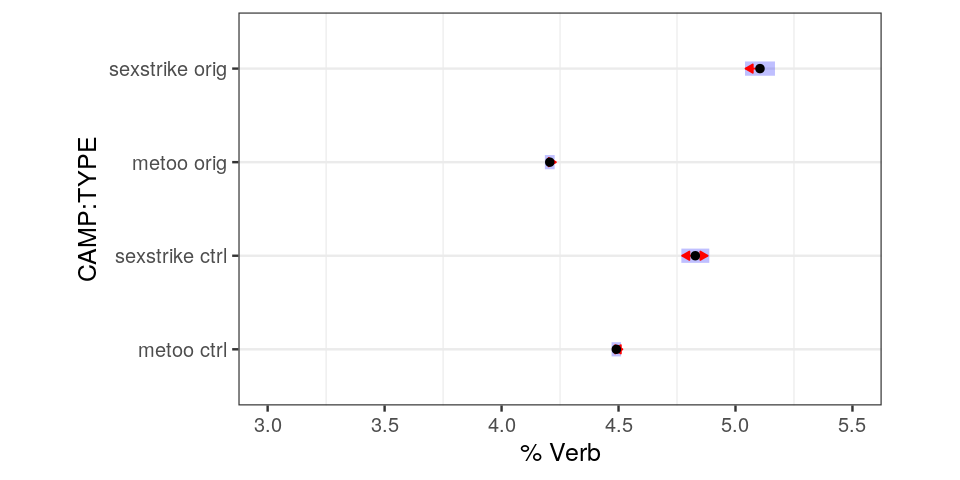

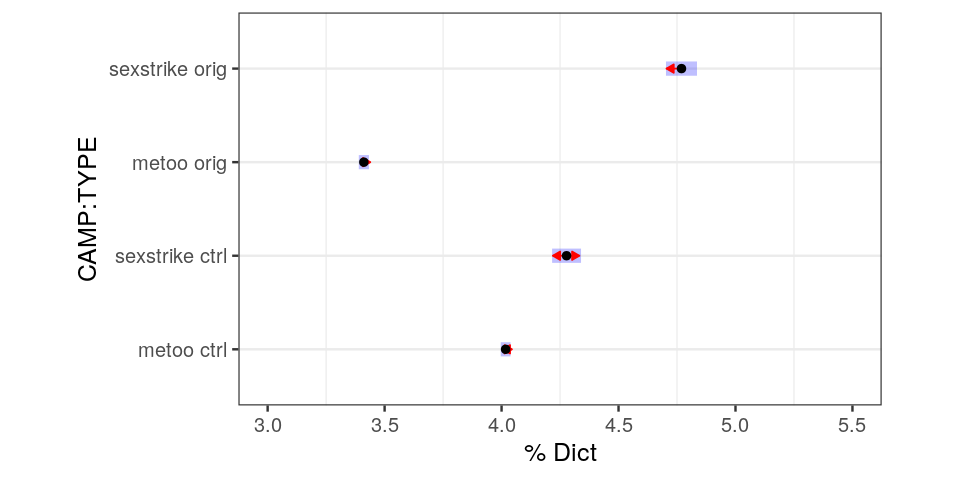

In [201]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)
# fig.height = 10
# fig.width = 5
plot(a1vb01PrcEm1, comparisons=TRUE, xlab="% Verb")+
coord_fixed(ratio = 0.4,xlim=c(3.00, 5.50),ylim=NULL,expand=TRUE,clip="on")
#+ 
#  theme(
#      plot.margin = margin(.2,.2,.2,.2, "cm"),
#      plot.background = element_rect(fill = "darkgrey")
#  )

plot(a2ag01PrcEm1, comparisons=TRUE, xlab="% Dict")+
coord_fixed(ratio = 0.4,xlim=c(3.00, 5.50),ylim=NULL,expand=TRUE,clip="on")


## Effect of TYPE (ctrl, orig) conditional on CAMP (#sexstrike, #metoo)

In [202]:
a1vb01PrcEm2 <- emmeans(a1vb01Prc, specs<-c("TYPE"), by<-"CAMP")
a2ag01PrcEm2 <- emmeans(a2ag01Prc, specs<-c("TYPE"), by<-"CAMP")

In [203]:
a1vb01PrcEm2

CAMP = metoo:
 TYPE emmean      SE     df lower.CL upper.CL
 ctrl  4.491 0.01031 681648    4.470    4.511
 orig  4.206 0.01067 681648    4.185    4.227

CAMP = sexstrike:
 TYPE emmean      SE     df lower.CL upper.CL
 ctrl  4.828 0.03044 681648    4.769    4.888
 orig  5.105 0.03267 681648    5.041    5.169

Confidence level used: 0.95 

In [204]:
a2ag01PrcEm2

CAMP = metoo:
 TYPE emmean     SE     df lower.CL upper.CL
 ctrl   4.02 0.0107 681648     4.00     4.04
 orig   3.41 0.0111 681648     3.39     3.43

CAMP = sexstrike:
 TYPE emmean     SE     df lower.CL upper.CL
 ctrl   4.28 0.0315 681648     4.22     4.34
 orig   4.77 0.0338 681648     4.70     4.84

Confidence level used: 0.95 

In [205]:
pairs(a1vb01PrcEm2)

CAMP = metoo:
 contrast    estimate     SE     df t.ratio p.value
 ctrl - orig    0.285 0.0148 681648 19.175  <.0001 

CAMP = sexstrike:
 contrast    estimate     SE     df t.ratio p.value
 ctrl - orig   -0.276 0.0447 681648 -6.192  <.0001 


In [206]:
pairs(a2ag01PrcEm2)

CAMP = metoo:
 contrast    estimate     SE     df t.ratio p.value
 ctrl - orig    0.606 0.0154 681648  39.423 <.0001 

CAMP = sexstrike:
 contrast    estimate     SE     df t.ratio p.value
 ctrl - orig   -0.491 0.0463 681648 -10.620 <.0001 


In [207]:
summary(as.glht(pairs(a1vb01PrcEm2)),test=TEST)

$`CAMP = metoo`

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
ctrl - orig == 0  0.28453    0.01484   19.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- free method)


$`CAMP = sexstrike`

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
ctrl - orig == 0 -0.27649    0.04466  -6.192 5.96e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- free method)



In [208]:
summary(as.glht(pairs(a2ag01PrcEm2)),test=TEST)

$`CAMP = metoo`

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
ctrl - orig == 0  0.60598    0.01537   39.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- free method)


$`CAMP = sexstrike`

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
ctrl - orig == 0 -0.49126    0.04626  -10.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- free method)



In [289]:
paste(CAMP,TYPE,":")

ERROR: Error in paste(CAMP, TYPE, ":"): object 'CAMP' not found


Warning message:
“The labeller API has been updated. Labellers taking `variable` and `value` arguments are now deprecated. See labellers documentation.”


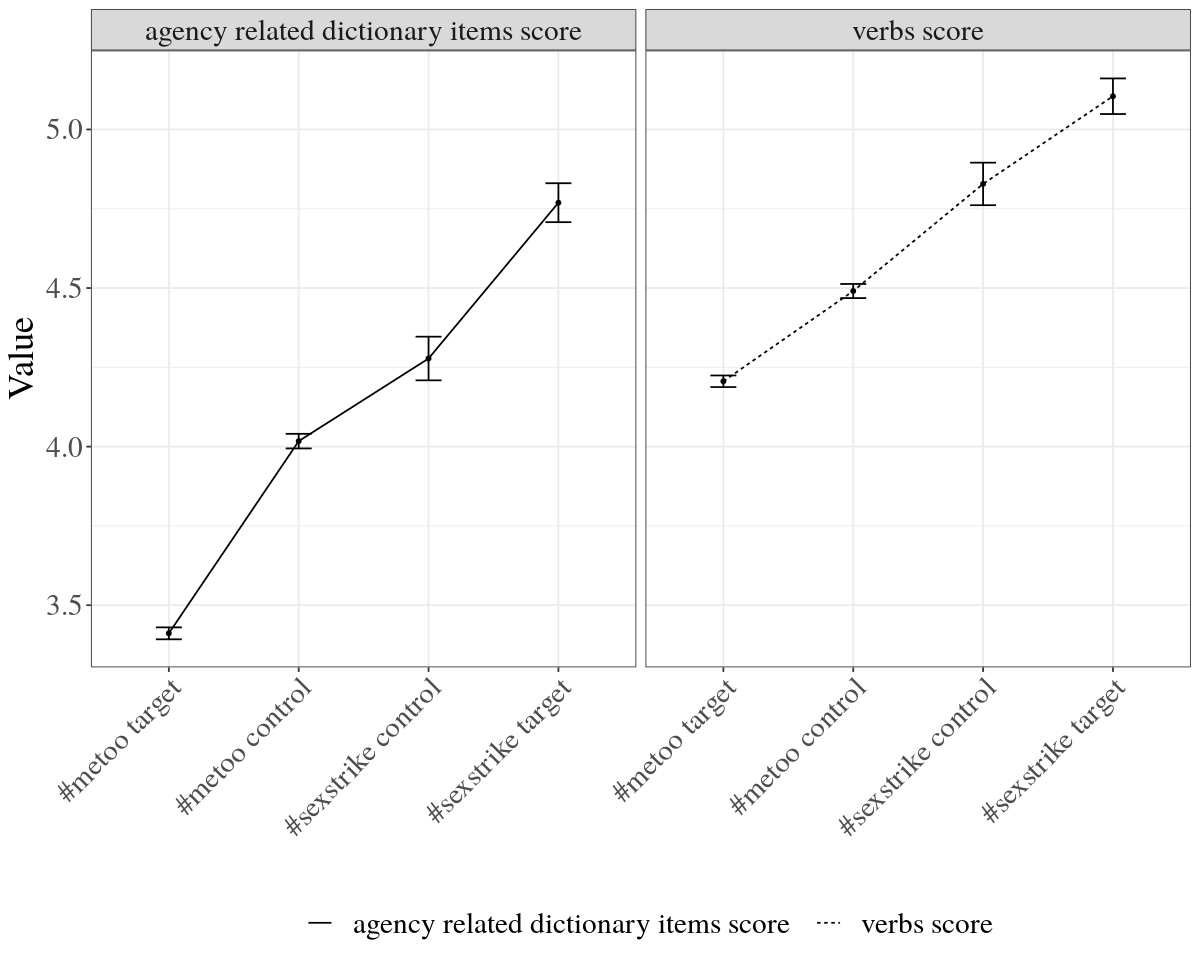

In [343]:
mLabels <- list(  "vb01Prc"     = "verbs score"
                       , "ag01Prc"     = "agency related dictionary items score"
)

mLabeller <- function(variable,value){
  return(mLabels[value])
}

options(repr.plot.width=10, repr.plot.height=8)
jt0 <- position_dodge(width=0.0)
gg0 <- df2 %>%
    gather(Measurement,Value,vb01Prc,ag01Prc) %>%
    ggplot(aes(x=reorder(paste(CAMP,TYPE),Value), y=Value, group=Measurement))

gg0 <- gg0+stat_summary(position = jt0, geom = "line", fun = mean,aes(linetype=Measurement))

# gg0 <- gg0+geom_line()
gg0 <- gg0+stat_summary(position = jt0, geom = "point",    fun.data = mean_cl_normal, size  = 1.0)
gg0 <- gg0+stat_summary(position = jt0, geom = "errorbar", fun.data = mean_cl_normal, width = 0.2)
# Campaign (#metoo, #sesstrike) ⨯ data type\n(target, control)
gg0 <- gg0+scale_x_discrete(name ="",
                            labels=c(
                                "metoo ctrl"     = "#metoo control"
                              , "metoo orig"     = "#metoo target"
                              , "sexstrike ctrl" = "#sexstrike control"
                              , "sexstrike orig" = "#sexstrike target"
                            ))
# Measurement
gg0 <- gg0+scale_linetype_discrete(name ="",
                                labels=c(
                                    "vb01Prc"     = "verbs score"
                                  , "ag01Prc"     = "agency related dictionary items score"
                            ))


# gg0 <- gg0+facet_grid( cols = vars(CAMP))
gg0 <- gg0+theme_bw()
gg0 <- gg0+theme(legend.position="bottom")
gg0 <- gg0+theme(text=element_text(size=22))
gg0 <- gg0+theme(text=element_text(family="Times"))
gg0 <- gg0+theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust=1))
# rows = vars(TYPE)
gg0 <- gg0+facet_grid(cols = vars(Measurement),labeller = mLabeller)

gg0

sample mean and 95% confidence intervals 

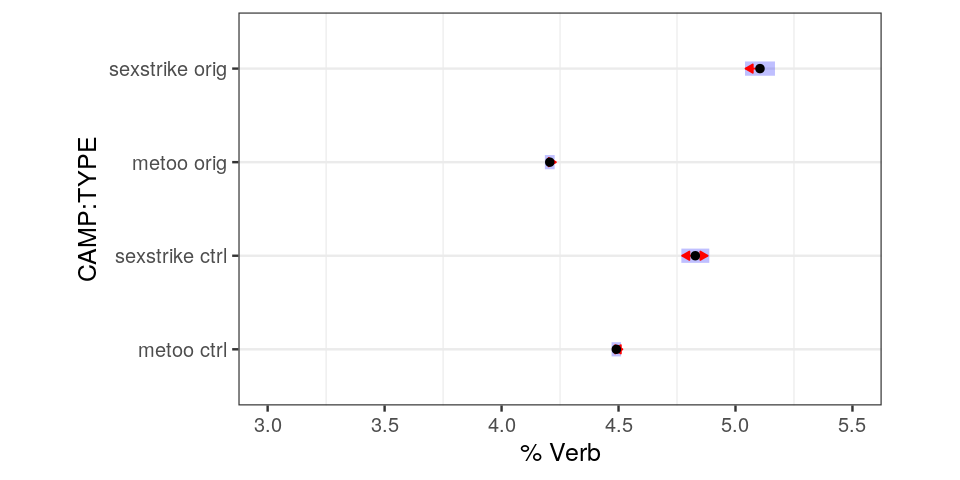

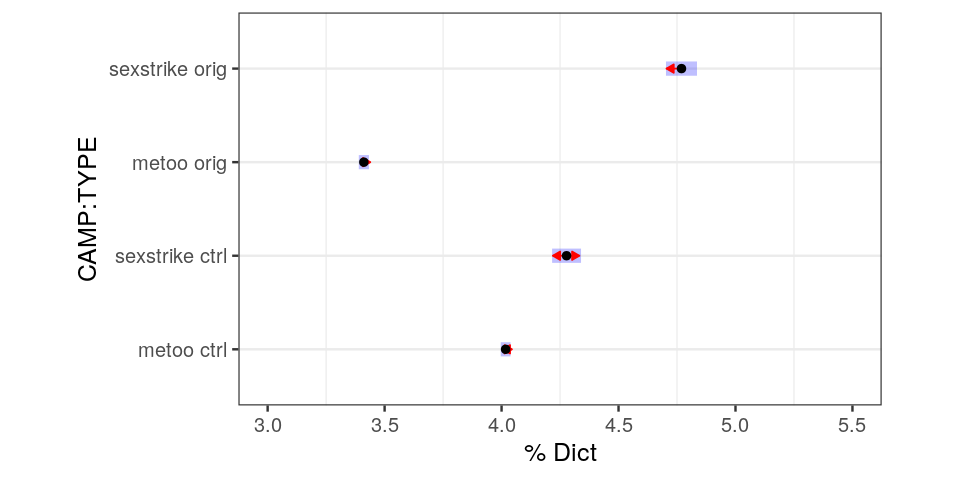

In [252]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)
# fig.height = 10
# fig.width = 5
plot(a1vb01PrcEm1, comparisons=TRUE, xlab="% Verb")+
coord_fixed(ratio = 0.4,xlim=c(3.0, 5.5),ylim=NULL,expand=TRUE,clip="on")
#+ 
#  theme(
#      plot.margin = margin(.2,.2,.2,.2, "cm"),
#      plot.background = element_rect(fill = "darkgrey")
#  )

plot(a2ag01PrcEm1, comparisons=TRUE, xlab="% Dict")+
coord_fixed(ratio = 0.4,xlim=c(3.0, 5.5),ylim=NULL,expand=TRUE,clip="on")

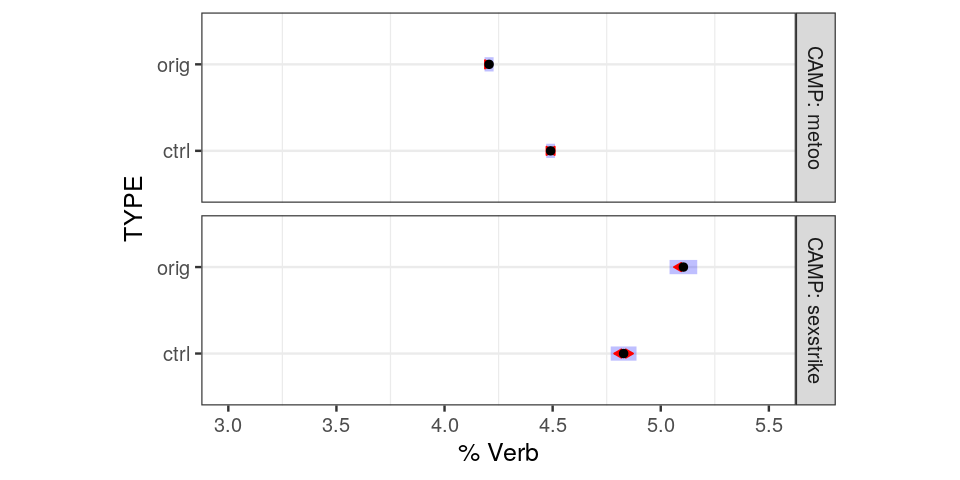

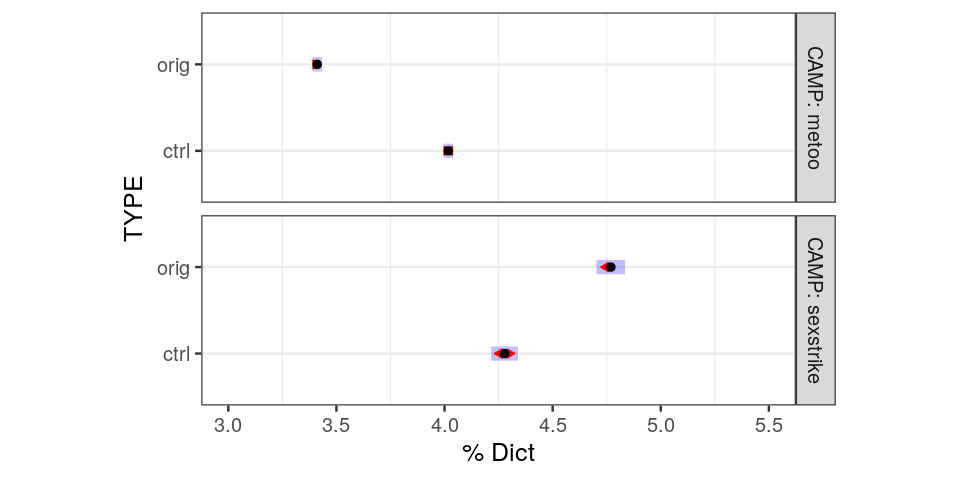

In [211]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)
# fig.height = 10
# fig.width = 5
plot(a1vb01PrcEm2, comparisons=TRUE, xlab="% Verb")+
coord_fixed(ratio = 0.4,xlim=c(3.00, 5.50),ylim=NULL,expand=TRUE,clip="on")
#+ 
#  theme(
#      plot.margin = margin(.2,.2,.2,.2, "cm"),
#      plot.background = element_rect(fill = "darkgrey")
#  )

plot(a2ag01PrcEm2, comparisons=TRUE, xlab="% Dict")+
coord_fixed(ratio = 0.4,xlim=c(3.00, 5.50),ylim=NULL,expand=TRUE,clip="on")


# Helpers

In [ ]:
?mixed

In [ ]:
?scale

In [ ]:
?lmer

In [ ]:
?aov_4

In [ ]:
?emmeans

In [ ]:
?coord_fixed

# Extras

In [ ]:
df2$retweets <- as.numeric(df2$retweets) # TODO FIXME This should be fixed elsewhere!

In [ ]:
df2$ReTw <- cut(df2$retweets,
                breaks=c(0, 5, 25, 125, Inf), 
                right  = FALSE,
              # labels=c("low","med","high","viral")
               )

str(df2)

# Playground

In [ ]:
plot_grid(
  afex_plot(
      a1vb01Prc, 
      x="TYPE", 
      trace="CAMP",
      error = "between", 
      data_geom = geom_quasirandom, 
      data_alpha = 0.3) + 
    coord_cartesian(ylim = c(0, 1)),
  afex_plot(
      a2ag01Prc, 
      x="TYPE", 
      trace="CAMP",
      error = "between", 
      data_geom = geom_quasirandom, 
      data_alpha = 0.3) +
    coord_cartesian(ylim = c(0, 1))
)

In [ ]:
qqPlot(a1vb01Prc$aov$residuals)

In [ ]:
qqPlot(a2ag01Prc$aov$residuals)

In [ ]:
shapiro.test(a1vb01Prc$aov$residuals)

In [ ]:
shapiro.test(a2ag01Prc$aov$residuals)

In [ ]:
ad.test(a1vb01Prc$aov$residuals)$p.value

In [ ]:
ad.test(a2ag01Prc$aov$residuals)$p.value

In [ ]:
test_levene(a1vb01Prc)

In [ ]:
test_levene(a2ag01Prc)

In [ ]:
library("pwr")

In [ ]:
?pwr.anova.test

In [ ]:
?summary

In [ ]:
convert_ipynb

In [ ]:
?apa_print


In [ ]:
methods("apa_print")